In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
student = pd.read_csv('Student Mental health (2).csv')
student.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,08-07-2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,Yes
1,08-07-2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,08-07-2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,Yes
3,08-07-2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,08-07-2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [3]:
#Information on features
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [4]:
#drop NA value
student= student[student['Age'].notna()]
student.shape

(100, 11)

In [5]:
student.head(1)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,08-07-2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,Yes


In [6]:
#Rename columns
student.columns = ['Timestamp', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
student.head(1)

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,08-07-2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,Yes


In [7]:
#Formatting the Year column
student['Year'].unique()
# array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2', 'Year 3'], dtype=object)

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [8]:
def Clean(Text):
    Text = Text[-1]
    Text = int(Text)
    return Text
student["Year"] = student["Year"].apply(Clean)
print("First three values of Year after cleaning text:")
print(student["Year"][:3], "\n")

First three values of Year after cleaning text:
0    1
1    2
2    1
Name: Year, dtype: int64 



In [9]:
student['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [10]:
def remove_space(string):
    string = string.strip()
    return string
student["CGPA"] = student["CGPA"].apply(remove_space)
print("First three values of CGPA after cleaning text:")
print(student["CGPA"][:3], "\n")
print(student['CGPA'].unique())

First three values of CGPA after cleaning text:
0    3.00 - 3.49
1    3.00 - 3.49
2    3.00 - 3.49
Name: CGPA, dtype: object 

['3.00 - 3.49' '3.50 - 4.00' '2.50 - 2.99' '2.00 - 2.49' '0 - 1.99']


In [11]:
len(student['Course'].unique())

49

In [12]:
#Let's replace redundant course name with the standard course name
student['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' ,'IT':'Computer Science Engineering', 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 'BIT':'Computer Science Engineering', 'psychology':'Psychology', 'koe': 'Koe', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law',
                       'Accounting ':'Accounting','Usuluddin ':'Usuluddin','Human Sciences ':'Human Sciences',
       'Communication ':'Communication','Pendidikan Islam ':'Pendidikan Islam','Nursing ':'Nursing'
                       } , inplace = True)
len(student['Course'].unique())

36

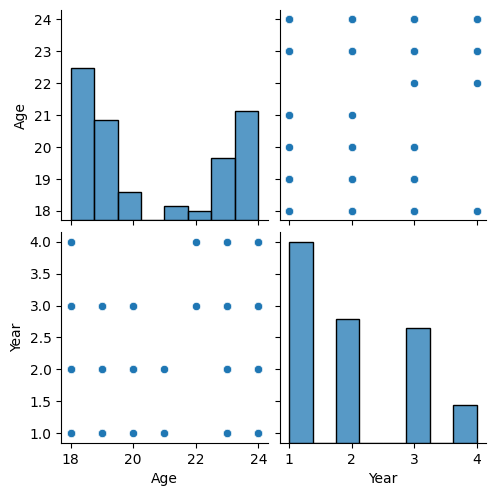

In [13]:
sns.pairplot(student)

[Text(0, 0, 'Engineering'),
 Text(1, 0, 'Computer Science Engineering'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Irkhs'),
 Text(4, 0, 'Psychology'),
 Text(5, 0, 'Banking Studies'),
 Text(6, 0, 'ALA'),
 Text(7, 0, 'BENL'),
 Text(8, 0, 'CTS'),
 Text(9, 0, 'Econs'),
 Text(10, 0, 'Malcom'),
 Text(11, 0, 'Biomedical science'),
 Text(12, 0, 'KOE'),
 Text(13, 0, 'Radiography'),
 Text(14, 0, 'Islamic Education')]

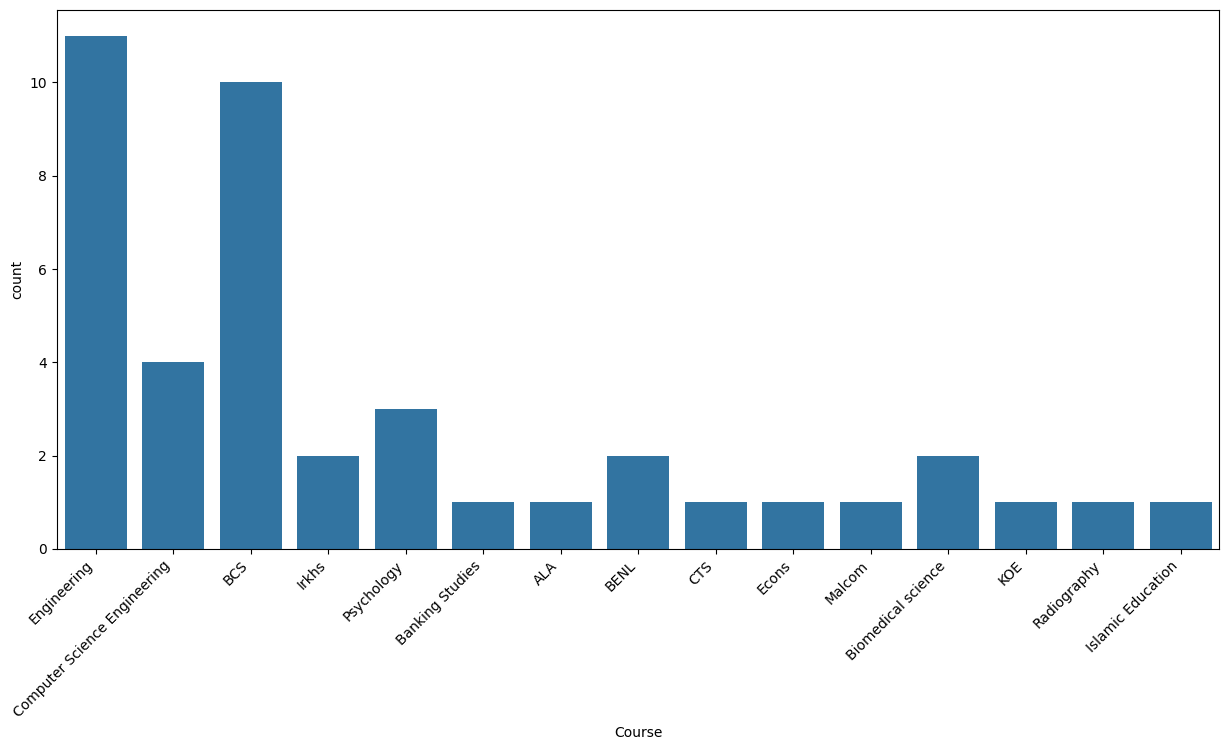

In [14]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = student[student['Year'] == 1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Islamic Education'),
 Text(1, 0, 'Engineering'),
 Text(2, 0, 'Pendidikan Islam'),
 Text(3, 0, 'Human Resources'),
 Text(4, 0, 'KENMS'),
 Text(5, 0, 'Computer Science Engineering'),
 Text(6, 0, 'Marine science'),
 Text(7, 0, 'KOE'),
 Text(8, 0, 'Business Administration'),
 Text(9, 0, 'BCS'),
 Text(10, 0, 'Usuluddin'),
 Text(11, 0, 'TAASL'),
 Text(12, 0, 'Human Sciences'),
 Text(13, 0, 'Communication'),
 Text(14, 0, 'Diploma Nursing'),
 Text(15, 0, 'Koe'),
 Text(16, 0, 'Biomedical science')]

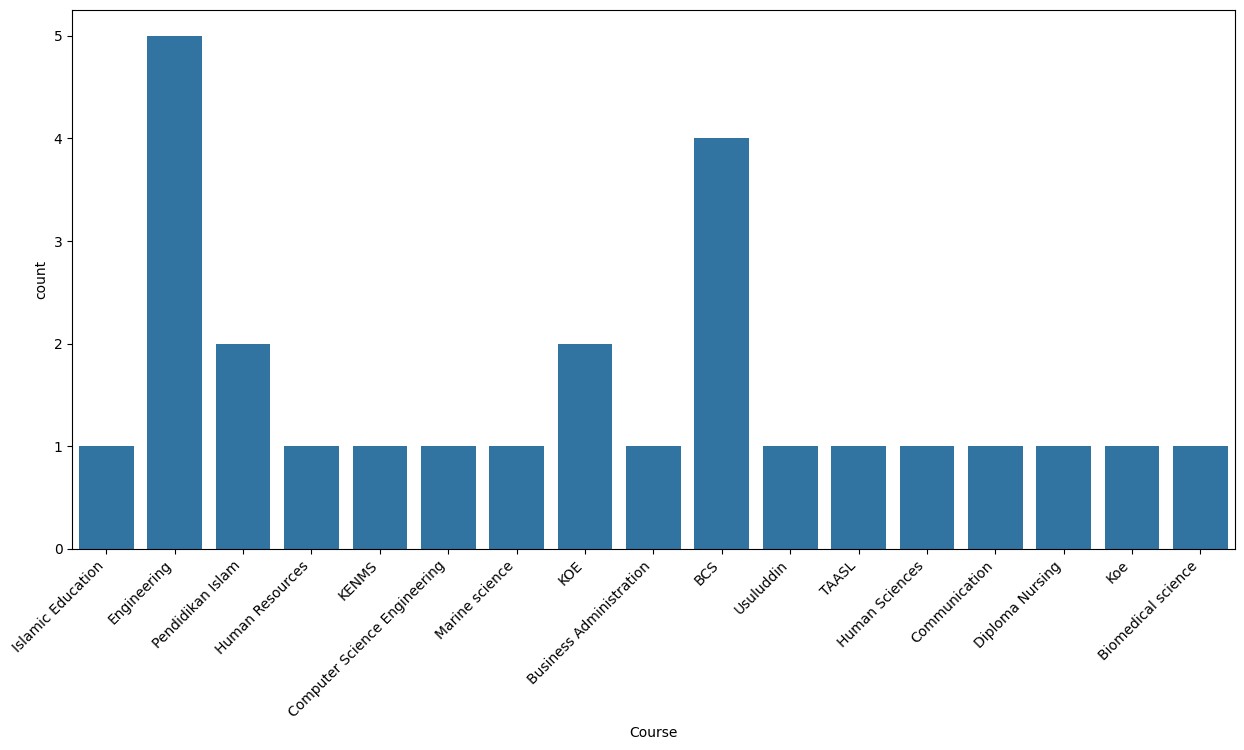

In [15]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = student[student['Year'] == 2])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Law'),
 Text(1, 0, 'Engineering'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Accounting'),
 Text(4, 0, 'Computer Science Engineering'),
 Text(5, 0, 'Biomedical science'),
 Text(6, 0, 'Koe'),
 Text(7, 0, 'Irkhs'),
 Text(8, 0, 'BENL'),
 Text(9, 0, 'KOE'),
 Text(10, 0, 'MHSC'),
 Text(11, 0, 'Biotechnology'),
 Text(12, 0, 'Fiqh'),
 Text(13, 0, 'DIPLOMA TESL'),
 Text(14, 0, 'Nursing')]

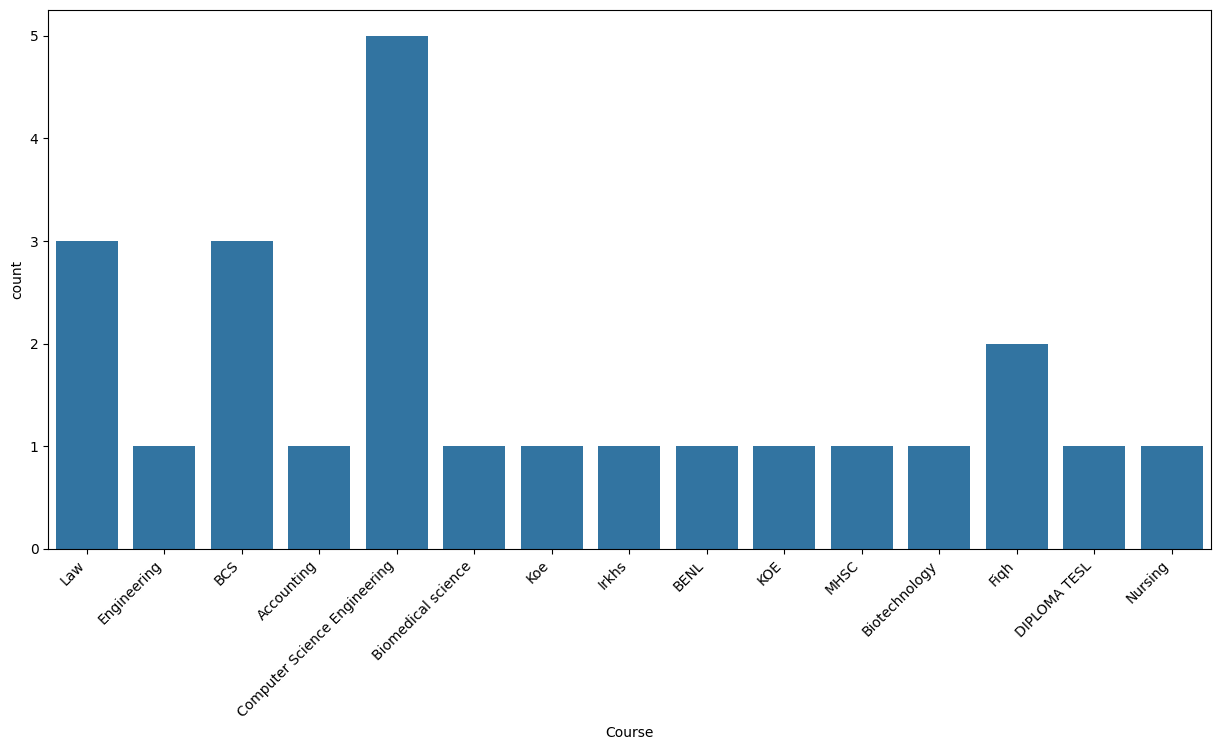

In [16]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = student[student['Year'] == 3])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Mathemathics'),
 Text(1, 0, 'ENM'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Engineering'),
 Text(4, 0, 'Kop'),
 Text(5, 0, 'Pendidikan Islam')]

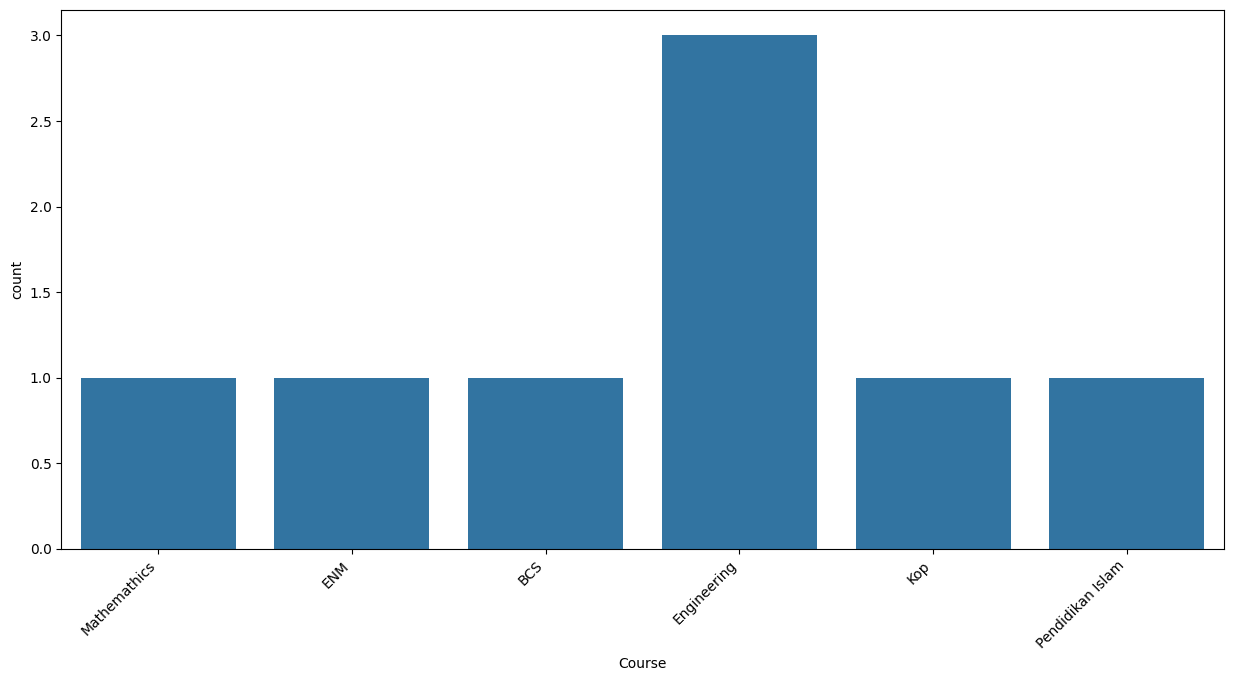

In [17]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = student[student['Year'] == 4])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

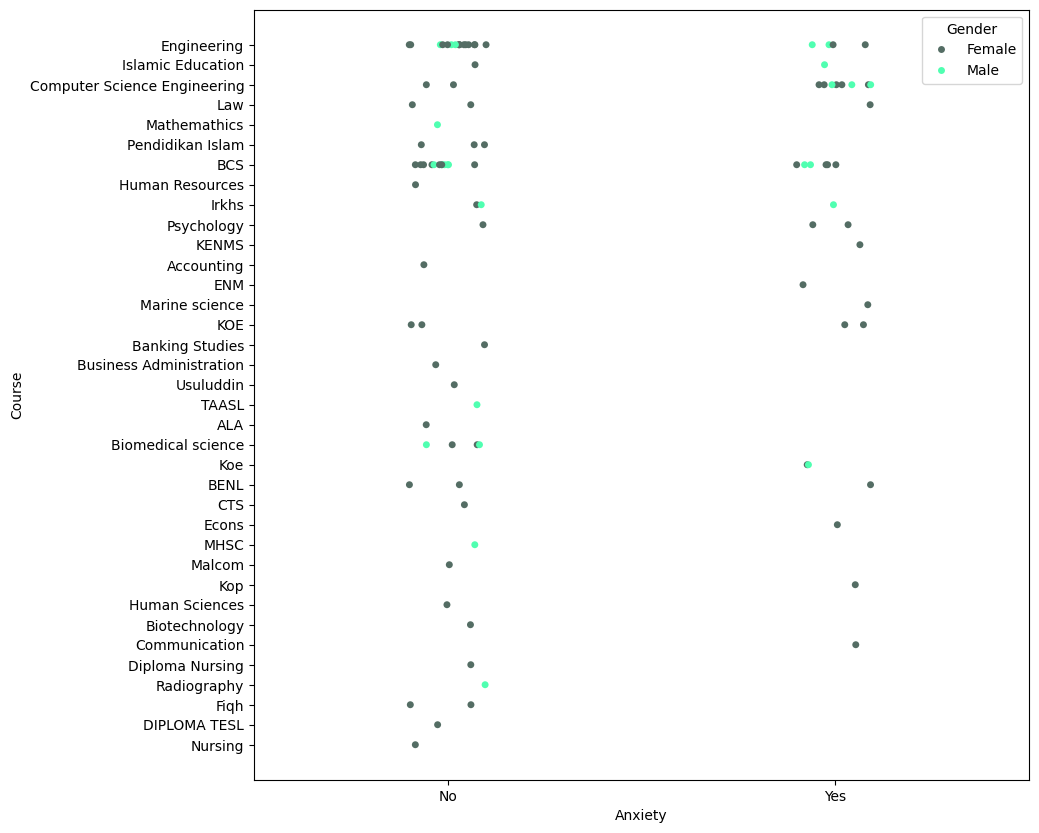

In [18]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Anxiety', y = 'Course', hue = 'Gender', data =student, palette = ['#546D64', '#50FFB1'])
plt.show()


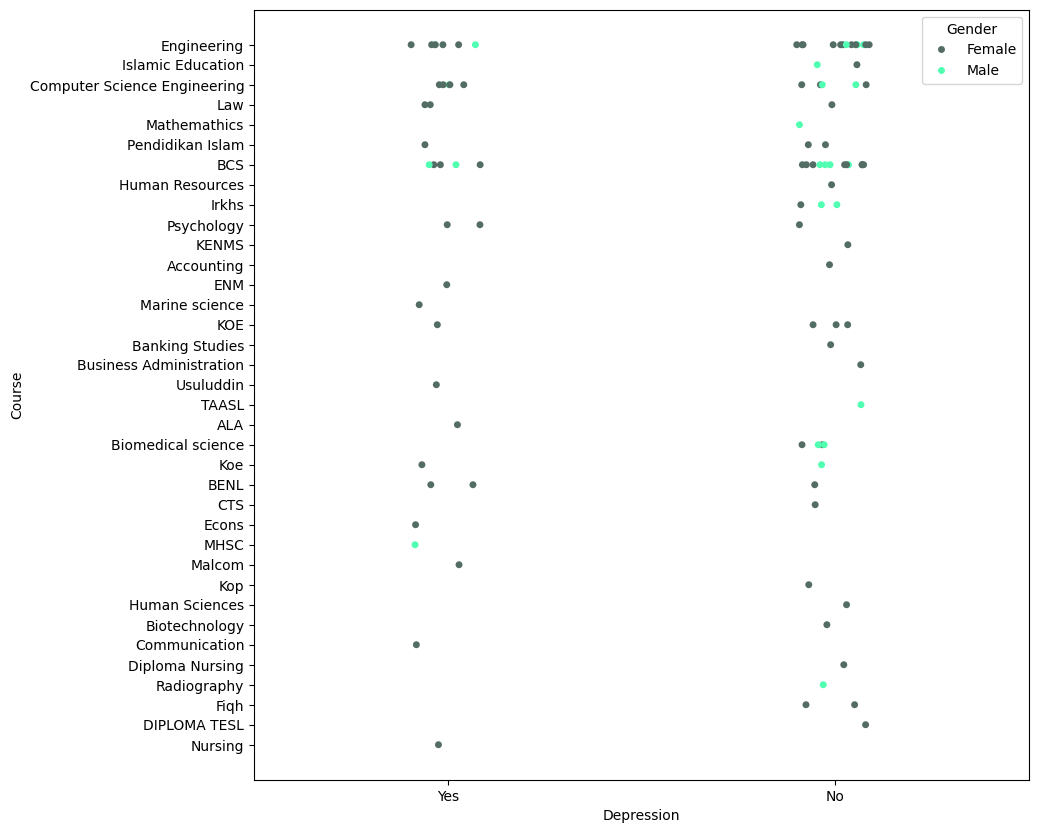

In [19]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Depression', y = 'Course', hue = 'Gender', data = student, palette = ['#546D64', '#50FFB1'])
plt.show()

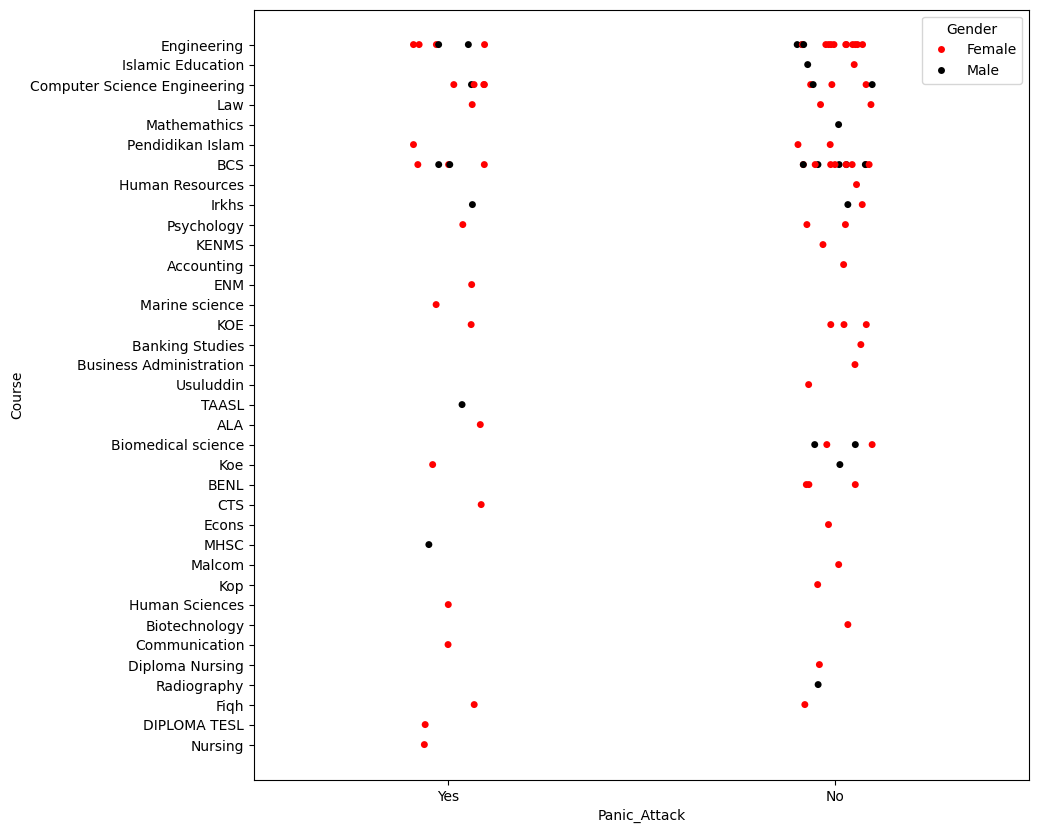

In [20]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Panic_Attack', y = 'Course', hue = 'Gender', data = student, palette = ['red', 'black'])
plt.show()

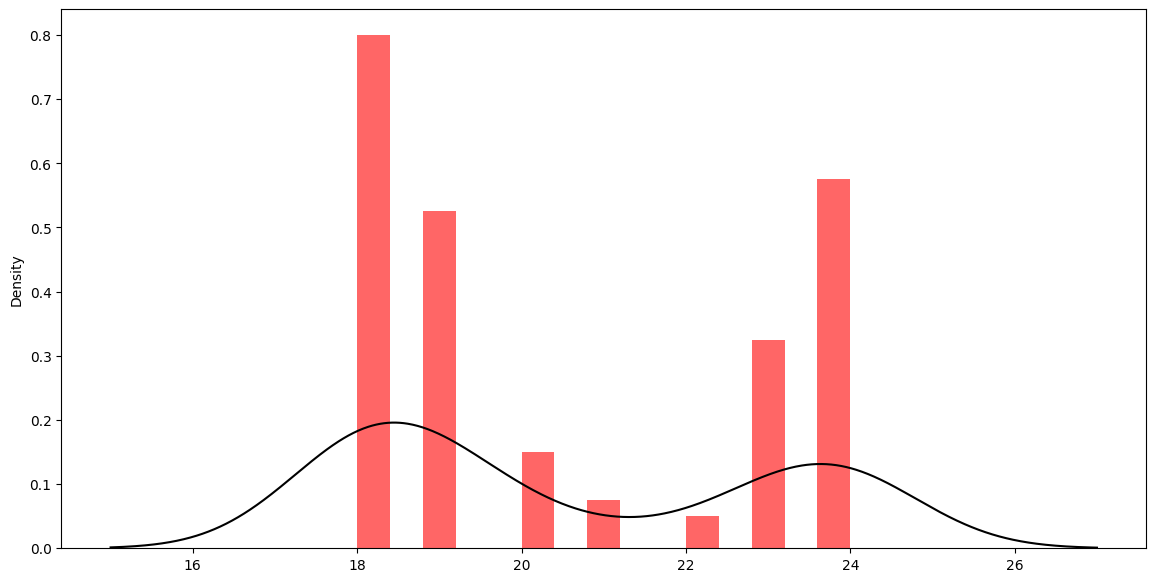

In [21]:
plt.figure(figsize=(14,7))
ax = student["Age"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.6)
student["Age"].plot(kind='density', color='black')
plt.show()

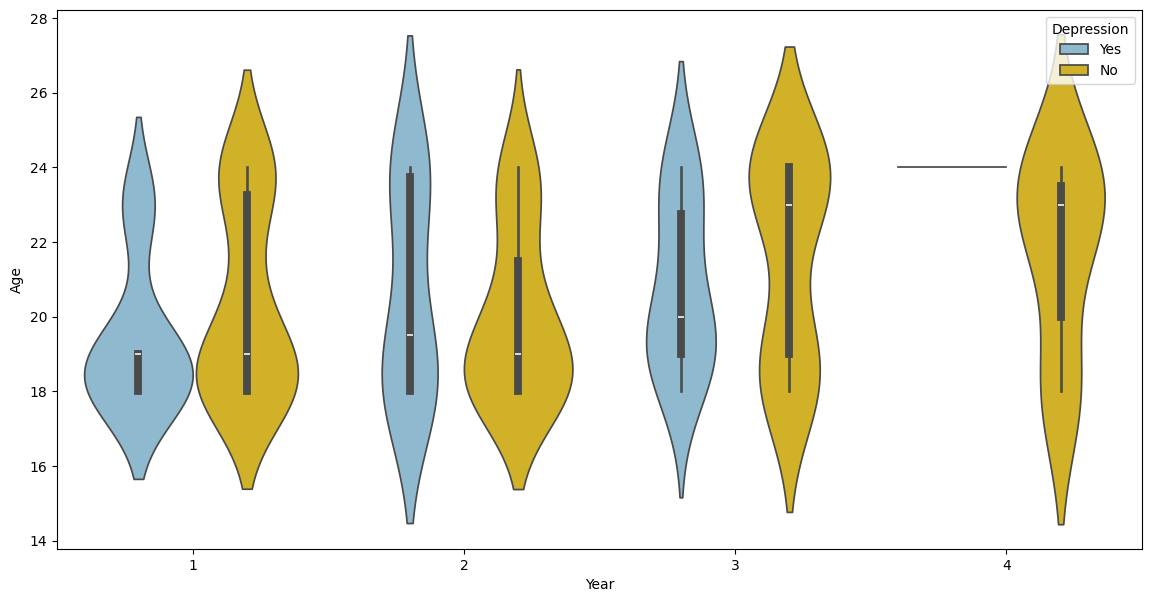

In [22]:
plt.figure(figsize=(14,7))
sns.violinplot(x = 'Year', y = 'Age', data = student,  hue = 'Depression', palette = ['#84BCDA', '#ECC30B'])
plt.show()

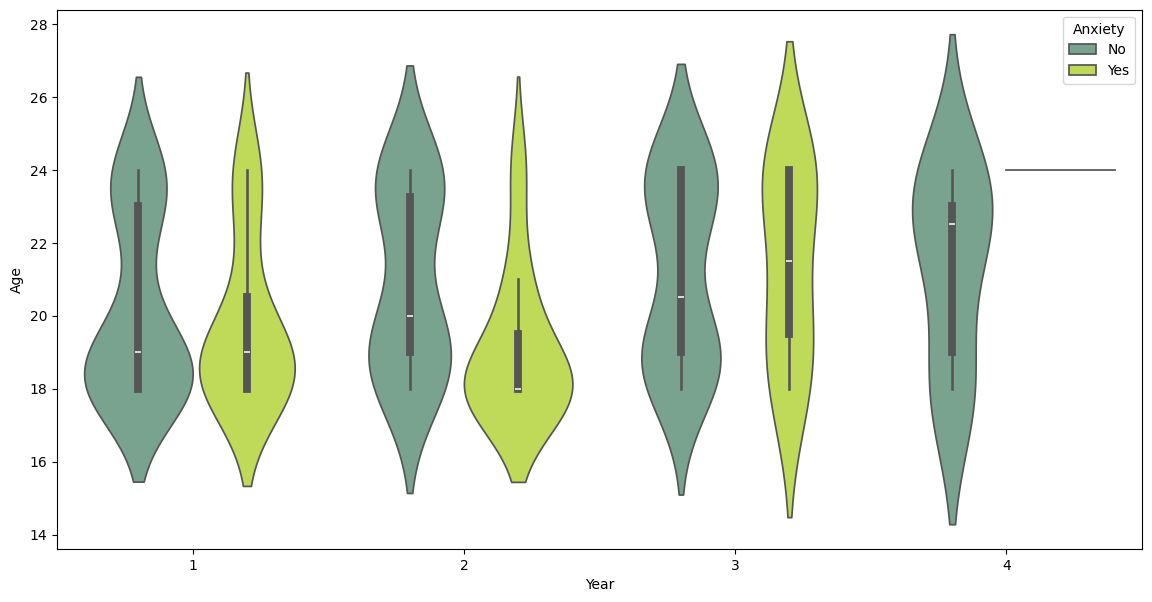

In [23]:
plt.figure(figsize=(14,7))
sns.violinplot(x = 'Year', y = 'Age', data = student,  hue = 'Anxiety', palette = ['#72A98F', '#CBEF43'])
plt.show()


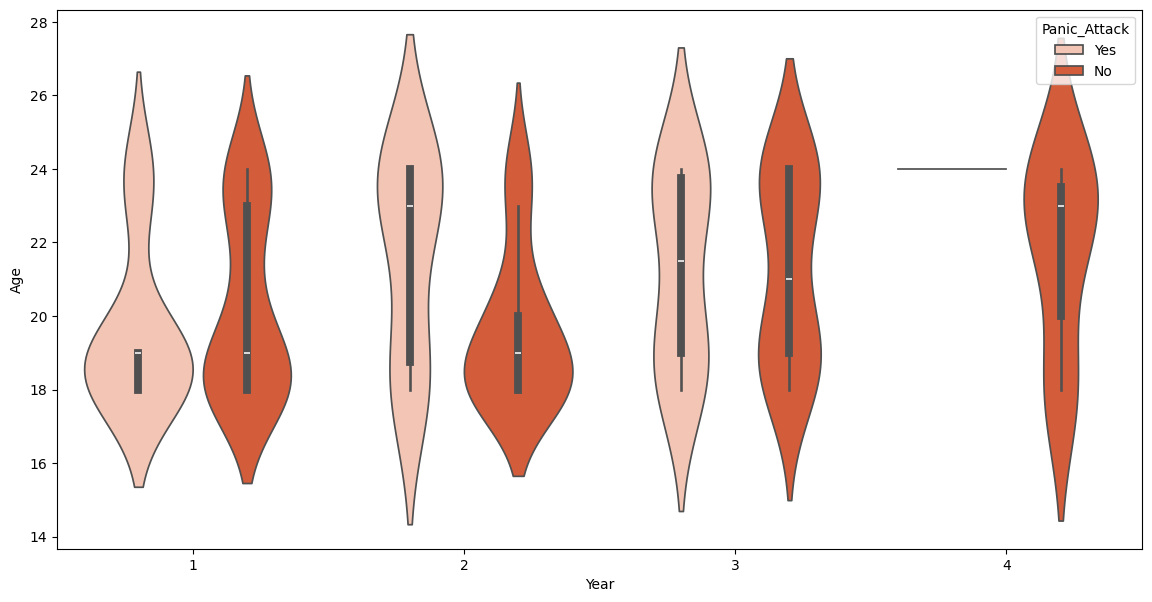

In [24]:
plt.figure(figsize=(14,7))
sns.violinplot(x = 'Year', y = 'Age', data = student,  hue = 'Panic_Attack', palette = ['#FEC0AA', '#EC4E20'])
plt.show()

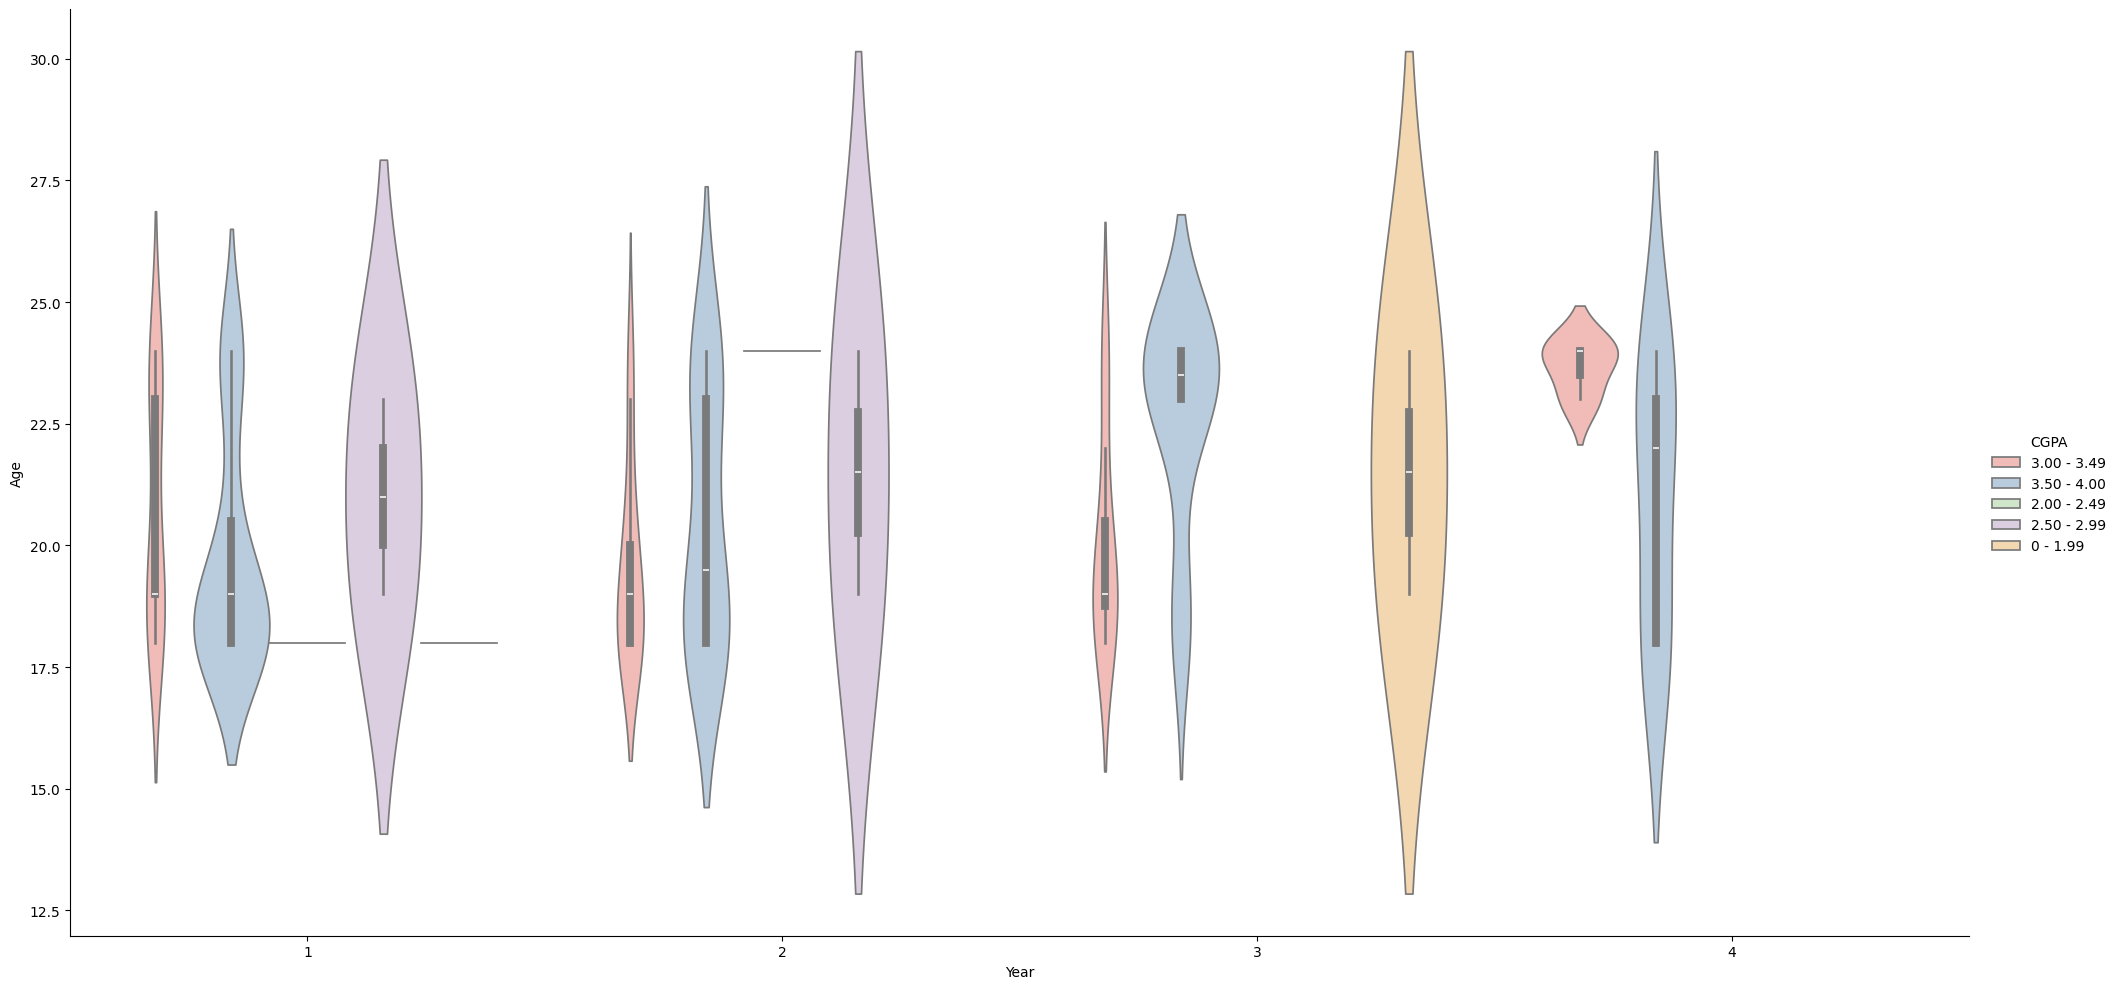

In [25]:
sns.catplot(data=student, x="Year", y="Age", hue="CGPA", kind="violin", palette="Pastel1",height=10,aspect=2)

<Axes: >

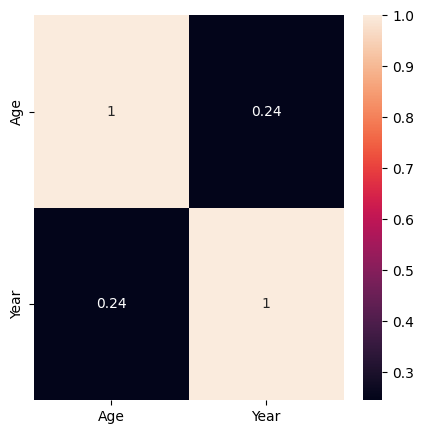

In [26]:
#correlation matrix
corrmat= student.corr()
plt.figure(figsize=(5,5))  
sns.heatmap(corrmat,annot=True, cmap=None)

In [27]:
student.drop('Timestamp', axis=1, inplace=True)

In [28]:
student.head(20)

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,Yes
1,Male,21.0,Islamic Education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,Computer Science Engineering,1,3.00 - 3.49,No,Yes,Yes,Yes,Yes
3,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No
5,Male,19.0,Engineering,2,3.50 - 4.00,No,No,No,Yes,No
6,Female,23.0,Pendidikan Islam,2,3.50 - 4.00,Yes,Yes,No,Yes,Yes
7,Female,18.0,BCS,1,3.50 - 4.00,No,No,Yes,No,No
8,Female,19.0,Human Resources,2,2.50 - 2.99,No,No,No,No,No
9,Male,18.0,Irkhs,1,3.50 - 4.00,No,No,Yes,Yes,Yes


In [29]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# categorical_columns= [x for x in data.columns if data.dtypes[x] == 'object']
# for column in categorical_columns:
#     data[column] = encoder.fit_transform(data[column])
# data.head()

In [30]:
student['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [31]:
student['Gender']=student['Gender'].map({'Female':0,'Male':1})

In [32]:
student.head(1)

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,0,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,Yes


In [33]:
student['Course']=student['Course'].map({'Engineering':0, 'Islamic Education':1, 'Computer Science Engineering':2,
       'Law':3, 'Mathemathics':4, 'Pendidikan Islam':5, 'BCS':6,
       'Human Resources':7, 'Irkhs':8, 'Psychology':9, 'KENMS':10, 'Accounting':11,
       'ENM':12, 'Marine science':13, 'KOE':14, 'Banking Studies':15,
       'Business Administration':16, 'Usuluddin':17, 'TAASL':18, 'ALA':19,
       'Biomedical science':20, 'Koe':21, 'BENL':22, 'CTS':23, 'Econs':24, 'MHSC':25,
       'Malcom':26, 'Kop':27, 'Human Sciences':28, 'Biotechnology':29,
       'Communication':30, 'Diploma Nursing':31,
       'Radiography':32, 'Fiqh':33, 'DIPLOMA TESL':34, 'Nursing':35})

In [34]:
student['Course'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35], dtype=int64)

In [35]:
student['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [36]:
student['CGPA']=student['CGPA'].map({'3.00 - 3.49':3, '3.50 - 4.00':4, '2.50 - 2.99':2, '2.00 - 2.49':1,
       '0 - 1.99':0})

In [37]:
student['CGPA'].unique()

array([3, 4, 2, 1, 0], dtype=int64)

In [38]:
student['Marital_Status'].unique()

array(['No', 'Yes'], dtype=object)

In [39]:
student['Marital_Status']=student['Marital_Status'].map({'No':0,'Yes':1})

In [40]:
student['Depression']=student['Depression'].map({'No':0,'Yes':1})

In [41]:
student['Anxiety']=student['Anxiety'].map({'No':0,'Yes':1})

In [42]:
student['Panic_Attack']=student['Panic_Attack'].map({'No':0,'Yes':1})

In [43]:
student.head(5)

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,0,18.0,0,1,3,0,1,0,1,Yes
1,1,21.0,1,2,3,0,0,1,0,No
2,1,19.0,2,1,3,0,1,1,1,Yes
3,0,22.0,3,3,3,1,1,0,0,No
4,1,23.0,4,4,3,0,0,0,0,No


<Axes: >

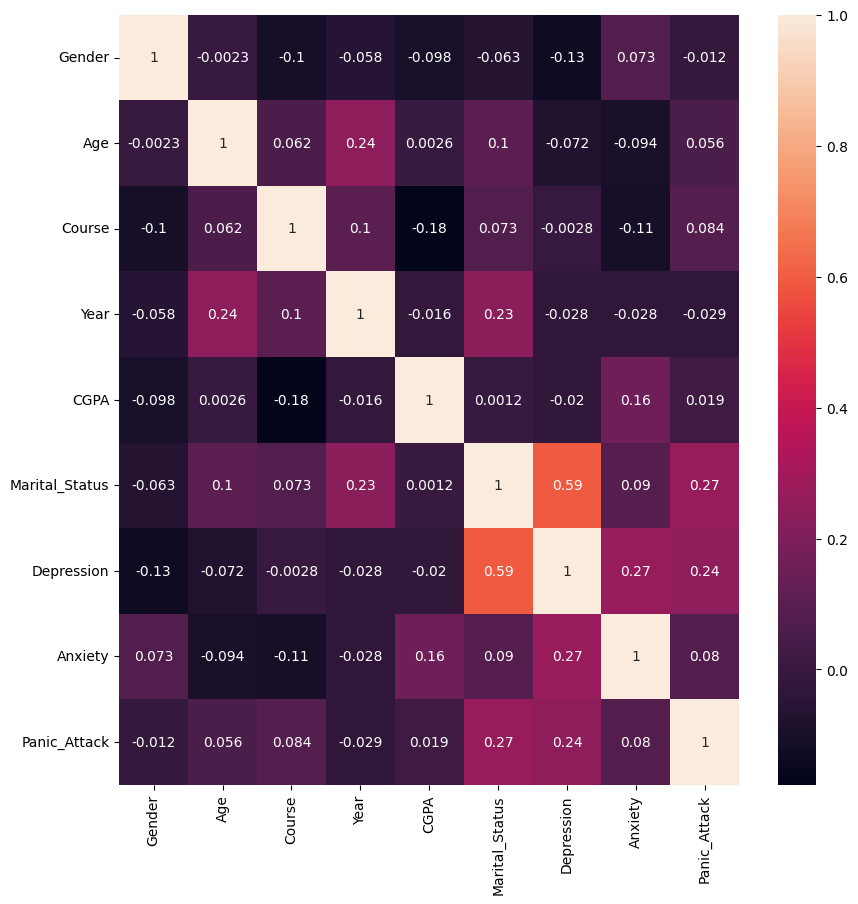

In [44]:
#correlation matrix
corrmat= student.corr()
plt.figure(figsize=(10,10))  
sns.heatmap(corrmat,annot=True, cmap=None)

In [45]:
X = student.drop(["Treatment"],axis=1)
y = student["Treatment"]

In [46]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [47]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])
# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.900000 
Decision Tree: 0.928571 
RandomForest: 0.942857 
SVC: 0.700000 


In [48]:
#taking look at the test set
pred_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.8666666666666667


In [49]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.8666666666666667

In [50]:
acccuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Random Forest Results *********
Accuracy    :  0.8666666666666667
Recall      :  0.8666666666666667
Precision   :  0.8864197530864197
F1 Score    :  0.8666666666666667


In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.85      1.00      0.92        23
         Yes       1.00      0.43      0.60         7

    accuracy                           0.87        30
   macro avg       0.93      0.71      0.76        30
weighted avg       0.89      0.87      0.85        30



<Axes: >

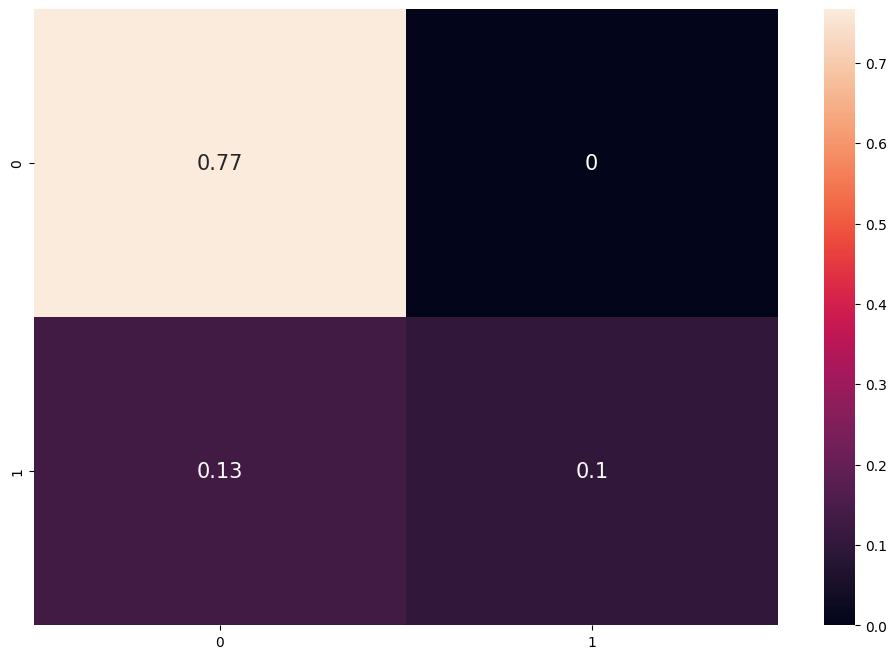

In [52]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=None,annot = True, annot_kws = {'size':15})

In [53]:
import pickle

In [54]:
pickle.dump(RF_model,open('RF_model.pkl','wb'))

In [55]:
model_RF=pickle.load(open('RF_model.pkl','rb'))
model_RF.predict(X_test)

array(['No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [56]:
import joblib

In [57]:
joblib.dump(RF_model,'RF_model.joblib')

['RF_model.joblib']

In [58]:
model_RF1=joblib.load('RF_model.joblib')

In [59]:
model_RF1.predict(X_test)

array(['No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [60]:
from tkinter import *
import joblib
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    text = clicked.get()
    if text == "Male":
        Gender=1
        print(Gender)
    else:
        Gender=0
        print(Gender)
    Age=float(e2.get())
    text = clicked1.get()
    if text=='Engineering':
        Course=0
    elif text=='Islamic Education':
        Course=1
    elif text=='Computer Science Engineering':
        Course=2
    elif text=='Law':
        Course=3
    elif text=='Mathemathics':
        Course=4
    elif text=='Pendidikan Islam':
        Course=5
    elif text=='BCS':
        Course=6
    elif text=='Human Resources':
        Course=7
    elif text=='Irkhs':
        Course=8
    elif text=='Psychology':
        Course=9
    elif text=='KENMS':
        Course=10
    elif text=='Accounting':
        Course=11
    elif text=='ENM':
        Course=12
    elif text=='Marine science':
        Course=13
    elif text=='KOE':
        Course=14
    elif text=='Banking Studies':
        Course=15
    elif text=='Business Administration':
        Course=16
            
    elif text=='Usuluddin':
        Course=17
    elif text=='TAASL':
        Course=18
    elif text=='ALA':
        Course=19
    elif text=='Biomedical science':
        Course=20
    elif text=='Koe':
        Course=21
    elif text=='BENL':
        Course=22
    elif text=='CTS':
        Course=23
    elif text=='Econs':
        Course=24
    elif text=='MHSC':
        Course=25
    elif text=='Malcom':
        Course=26
    elif text=='Kop':
        Course=27
    elif text=='Human Sciences':
        Course=28
    elif text=='Biotechnology':
        Course=29
    elif Course=='Communication':
         Course=30
    elif Course=='Diploma Nursing':
        Course=31
    elif Course=='Radiography':
        Course=32
        
    elif Course=='Fiqh':
        Course=33
    elif Course=='DIPLOMA TESL':
        Course=34
    else:
        Course=35
    Year=int(e4.get())
    text = clicked6.get()
    if text=='3.00 - 3.49':
        CGPA=3
    elif text=='3.50 - 4.00':
        CGPA=4
    elif text=='2.50 - 2.99':
        CGPA=2
    elif text=='2.00 - 2.49':
        CGPA=1
    else:
        CGPA=0
    text = clicked2.get()
    if text=='Yes':
        Marital_Status=1
    else:
        Marital_Status=0
        print(Marital_Status)
#     p7=float(e7.get())
    text = clicked3.get()
    if text=='Yes':
        Depression=1
    else:
        Depression=0
        print(Depression)
    text = clicked4.get()
    if text=='Yes':
        Anxiety=1
    else:
        Anxiety=0
        print(Anxiety)

    text = clicked5.get()
    if text=='Yes':
        Panic_Attack=1
    else:
        Panic_Attack=0
        print(Panic_Attack)
        

#     model_RF1=joblib.load('RF_model.joblib')
    new_data = pd.DataFrame({
    'Gender':Gender,
    'Age':Age,
    'Course':Course,
    'Year':Year,
    'CGPA':CGPA,
    'Marital_Status':Marital_Status,
    'Depression':Depression,
    'Anxiety':Anxiety,
    'Panic_Attack':Panic_Attack,  
},index=[0])

    model = joblib.load('RF_model.joblib')
    result=model.predict(new_data)
    
    if result == 'No':
        Label(master, text="No Treatment Required ").grid(row=31)
    else:
        Label(master, text="Treatment required").grid(row=31)
master = Tk()
master.title("Mental Health Prediction Using Machine Learning")
master.geometry('500x500')

label = Label(master, text = "Mental Health Prediction Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

Label(master, text="Gender",font=("Arial", 15)).grid(row=1)
Label(master, text="Age",font=("Arial", 15)).grid(row=2)
Label(master, text="Course",font=("Arial", 15)).grid(row=3)
Label(master, text="Year",font=("Arial", 15)).grid(row=4)
Label(master, text="CGPA",font=("Arial", 15)).grid(row=5)
Label(master, text="Marital_Status",font=("Arial", 15)).grid(row=6)
Label(master, text="Depression",font=("Arial", 15)).grid(row=7)
Label(master, text="Anxiety",font=("Arial", 15)).grid(row=8)
# Label(master, text="Work Experience",font=("Arial", 15)).grid(row=9)
Label(master, text="Panic_Attack",font=("Arial", 15)).grid(row=9)
# Label(master, text="branch specialization",font=("Arial", 15)).grid(row=10)
# Label(master, text="MBA percentage",font=("Arial", 15)).grid(row=11)
clicked = StringVar()
options = ["Male","Female"]

clicked1 = StringVar()
options1 = ['Engineering', 'Islamic Education', 'Computer Science Engineering',
       'Law', 'Mathemathics', 'Pendidikan Islam', 'BCS',
       'Human Resources', 'Irkhs', 'Psychology', 'KENMS', 'Accounting',
       'ENM', 'Marine science', 'KOE', 'Banking Studies',
       'Business Administration', 'Usuluddin', 'TAASL', 'ALA',
       'Biomedical science', 'Koe', 'BENL', 'CTS', 'Econs', 'MHSC',
       'Malcom', 'Kop', 'Human Sciences', 'Biotechnology',
       'Communication', 'Diploma Nursing',
       'Radiography', 'Fiqh', 'DIPLOMA TESL', 'Nursing']

clicked2 = StringVar()
options2 = ["Yes","No"]

clicked3 = StringVar()
options3 = ["Yes","No"]
clicked4 = StringVar()
options4 = ["Yes","No"]

clicked5 = StringVar()
options5 = ["Yes","No"]

clicked6 = StringVar()
options6 = ['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99']
e1 = OptionMenu(master , clicked , *options )#gender
e1.configure(width=13)
e2 = Entry(master)#------------------------------age
e3 = OptionMenu(master , clicked1 , *options1 )#course
e3.configure(width=13)
e4 = Entry(master)#----------------------------year
e5 = OptionMenu(master , clicked6 , *options6)#cgpa
e5.configure(width=13)
e6 = OptionMenu(master , clicked2 , *options2)#marital
e6.configure(width=13)
# e7 = Entry(master)
e7 = OptionMenu(master , clicked3 , *options3)#depression
e7.configure(width=13)
e8 = OptionMenu(master , clicked4 , *options4)#anxiety
e8.configure(width=13)
# e9 = Entry(master)
e9 = OptionMenu(master , clicked5 , *options5)#panic 
e9.configure(width=13)
# e11 = Entry(master)
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
# e9.grid(row=9, column=1)
e9.grid(row=9, column=1)
# e10.grid(row=10, column=1)
# e11.grid(row=11, column=1)
Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()